Лабораторная 1: Вычисление e^x c заданой точностью

In [1]:
def exp_eps(x, eps):
    res = 1
    i = 1
    numer = x
    denum = i
    while(numer/denum > eps):
        res += numer/denum
        numer *= x
        i += 1
        denum *= i
    return res

exp_eps(2, 0.00001)

7.389046015712681

Лабораторная 2: Численное дифференцирование

In [2]:
def diff_left(h, f, x0):
    return (f[x0] - f[x0 - h]) / h
def diff_right(h, f, x0):
    return (f[x0 + h] - f[x0]) / h
def diff_center(h, f, x0):
    return (diff_left(h, f, x0) + diff_right(h, f, x0)) / 2
def second_diff(h, f, x0):
    return (f[x0 + h] + f[x0 - h] - 2 * f[x0]) / (h * h)

f = {
    1.0: 0.0,
    1.5: 0.40547,
    2.0: 0.69315,
    2.5: 0.91629,
    3.0: 1.0986
}
h = 0.5
x0 = 2.0
print(diff_left(h, f, x0))
print(diff_right(h, f, x0))
print(diff_center(h, f, x0))
print(second_diff(h, f, x0))

0.5753600000000001
0.44628
0.51082
-0.25816000000000017


Лабораторная 3: Интерполяционные многочлены Лагранжа и Ньютона

In [3]:
from math import pi
from math import cos

def f(x):
    return cos(x)

def L(X, x0):
    res = 0
    for i in range(len(X)):
        mult = f(x0)
        for j in range(len(X)):
            if i != j:
                mult *= (x0 - X[j])/(X[i] - X[j])
        res += mult
    return res

def fp(X, i, j):
    if j - i == 0:
        return f(X[i])
    else:
        return (fp(X, i, j-1) - fp(X, i+1, j)) / (X[i] - X[j])

def P(X, x0):
    res = fp(X, 0, 0)
    fact = 1
    for i in range(1, len(X)):
        fact *= (x0 - X[i - 1])
        res += fact * fp(X, 0, i)
    return res

X = [0, pi / 6, 2 * pi / 6, 3 * pi / 6]
x0 = pi / 4

print(L(X, x0))
print(P(X, x0))
print(f(x0))

0.7071067811865474
0.7058892896287468
0.7071067811865476


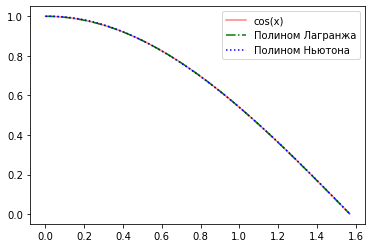

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([x for x in np.arange(0, 3*pi/6, 0.01)], [f(x) for x in np.arange(0, 3*pi/6, 0.01)], label="cos(x)", color = "r", alpha = 0.5)
plt.plot([x for x in np.arange(0, 3*pi/6, 0.01)], [L(X, x) for x in np.arange(0, 3*pi/6, 0.01)], label="Полином Лагранжа", color = "g", linestyle="-.")
plt.plot([x for x in np.arange(0, 3*pi/6, 0.01)], [P(X, x) for x in np.arange(0, 3*pi/6, 0.01)], label="Полином Ньютона", color = "b", linestyle=":")
plt.legend()
plt.show()

Лабораторная 4: Интерполяция сплайнами

In [5]:
def TDMA(X, Y):
    f = np.array([3 * ((Y[i] - Y[i-1]) / (X[i] - X[i-1]) - (Y[i-1] - Y[i-2])/(X[i-1] - X[i-2])) for i in range(2, len(Y))])
    b = np.array([X[i] - X[i-1] for i in range(2, len(Y) - 1)])
    b = np.append(b, 0)
    c = np.array([2*(X[i] - X[i-2]) for i in range(2, len(Y))], dtype = "float64")
    a = np.array([X[i-1] - X[i-2] for i in range(3, len(Y))])
    a = np.insert(a, 0, 0)
    
    a, b, c, f = tuple(map(lambda k_list: list(map(float, k_list)), (a, b, c, f)))

    alpha = [-b[0] / c[0]]
    beta = [f[0] / c[0]]
    n = len(f)
    x = [0]*n

    for i in range(1, n):
        alpha.append(-b[i]/(a[i]*alpha[i-1] + c[i]))
        beta.append((f[i] - a[i]*beta[i-1])/(a[i]*alpha[i-1] + c[i]))

    x[n-1] = beta[n - 1]

    for i in range(n-1, -1, -1):
        x[i - 1] = alpha[i - 1]*x[i] + beta[i - 1]

    return x

def S(X, Y, x0):
    c = TDMA(X, Y)
    c.insert(0, .0)
    c.append(.0)
    a = np.zeros(len(c))
    b = np.zeros(len(c))
    d = np.zeros(len(c))
    c.insert(0, .0)
    for i in range(1, len(a)):
        h = X[i] - X[i-1]
        a[i] = Y[i-1]
        b[i] = (Y[i]-Y[i-1])*h - h*(c[i+1] + 2 * c[i])/3
        d[i] = (c[i+1] - c[i]) / 3 / h
    for i in range(1, len(X)):
        if x0 >= X[i-1] and x0 <= X[i]:
            h = x0 - X[i-1]
            return a[i] + b[i] * h + c[i] * h * h + d[i] * h * h * h 
    return None
X = [0, 1, 2, 3, 4]
Y = [1.0, 0.86603, 0.5, 0, -0.5]
x0 = 1.5
S(X, Y, x0)

0.7108741517857143

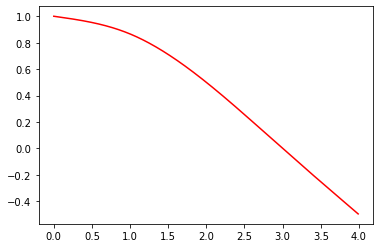

In [6]:
plt.clf()
plt.plot([x for x in np.arange(0, 4, 0.01)], [S(X, Y, x) for x in np.arange(0, 4, 0.01)], color = "r")
plt.show()

Лабораторная 5: Метод наименьших квадратов

In [7]:
def sum_of_pows(X, Y, p):
    return sum([y * (x**p) for x, y in zip(X, Y)])

def solve(X, Y, n, x0):
    
    ones = np.ones(len(X))
    
    #Вычислим матрицу системы
    w = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        curr_sum = sum_of_pows(X, ones, i)
        for j in range(n + 1):
            w[i - j][j] = curr_sum
    for i in range(n + 1, 2*n + 1):
        curr_sum = sum_of_pows(X, ones, i)
        for j in range(i - n, n + 1):
            w[j][i - j] = curr_sum
    
    #Вычислим правую часть системы
    f = np.array([sum_of_pows(X, Y, p) for p in range(n+1)])
    
    if np.linalg.det(w) == 0:
        print("Вырожденная система")
        return None
    
    a = np.linalg.inv(w).dot(f)
    X0 = [x0 ** i for i in range(n + 1)]
    return a.dot(X0)

X = np.array([-1.0, .0, 1.0, 2.0, 3.0, 4.0])
Y = np.array([0.86603, 1.0, 0.86603, 0.5, .0, -0.5])

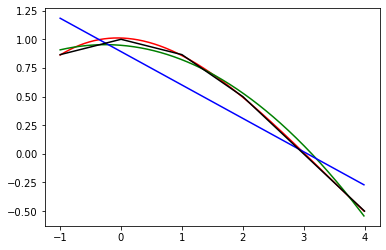

In [8]:
plt.clf()
plt.plot([x for x in np.arange(-1.0, 4.0, 0.01)], [solve(X, Y, 3, x) for x in np.arange(-1.0, 4.0, 0.01)], color = "r")
plt.plot([x for x in np.arange(-1.0, 4.0, 0.01)], [solve(X, Y, 2, x) for x in np.arange(-1.0, 4.0, 0.01)], color = "g")
plt.plot([x for x in np.arange(-1.0, 4.0, 0.01)], [solve(X, Y, 1, x) for x in np.arange(-1.0, 4.0, 0.01)], color = "b")
plt.plot([x for x in X], [y for y in Y], color = "black")
plt.show()

Лабораторная 6: Численное интегрирование

In [9]:
def f(x):
    return x / (3*x + 4)**2
def left_rect_approx(a, b, h):
    return sum([f(i) * h for i in np.arange(a, b, h)])
def right_rect_approx(a, b, h):
    return sum([f(i + h) * h for i in np.arange(a, b, h)])
def mid_rect_approx(a, b, h):
    return sum([f(i + h/2) * h for i in np.arange(a, b, h)])
def trapezoid_approx(a, b, h):
    return h * (f(a) + f(b)) / 2 + h * sum([f(i) for i in np.arange(a + h, b, h)])
def simpson_approx(a, b, h):
    return h / 6 * (f(a) + f(b) + 2 * sum([f(i) for i in np.arange(a + h, b, h)]) + 4 * sum([f(i + h/2) for i in np.arange(a, b, h)]))

a, b, h = 0, 4, 1.0
print(left_rect_approx(a, b, h))
print(right_rect_approx(a, b, h))
print(mid_rect_approx(a, b, h))
print(trapezoid_approx(a, b, h))
print(simpson_approx(a, b, h))

0.05815964255524695
0.07378464255524694
0.07284061196629331
0.06597214255524694
0.07055112216261118


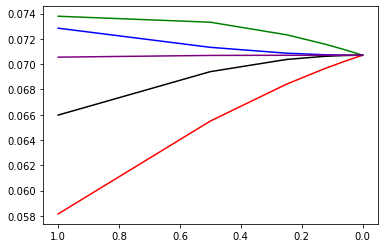

In [10]:
d = 1
delta = []
while d > 0.00001:
    delta.append(d)
    d /= 2
plt.clf()
plt.plot([d for d in delta], [left_rect_approx(a, b, d) for d in delta], color = "r")
plt.plot([d for d in delta], [right_rect_approx(a, b, d) for d in delta], color = "g")
plt.plot([d for d in delta], [mid_rect_approx(a, b, d) for d in delta], color = "b")
plt.plot([d for d in delta], [trapezoid_approx(a, b, d) for d in delta], color = "black")
plt.plot([d for d in delta], [simpson_approx(a, b, d) for d in delta], color = "purple")
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()